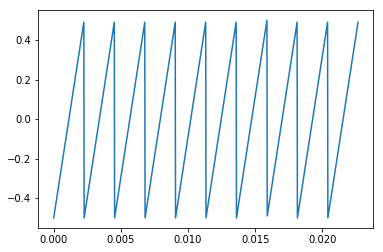

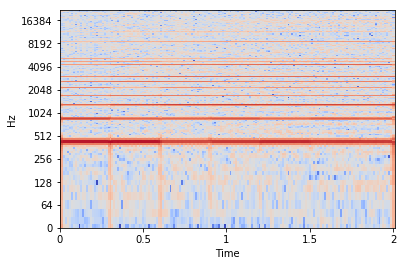

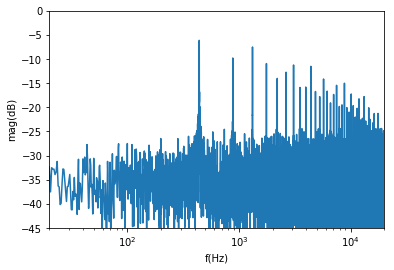

In [12]:
import IPython.display as ipd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

# generators
def sine(A):
    def _sine(sr, f, t):
        return A * np.sin(2 * np.pi * f * t)

def saw(A):
    def _saw(sr, f, t):
        return A * scipy.signal.sawtooth(2 * np.pi * f * t)
    return _saw

# y[n] = x[n] + y[n-d]
# d is in seconds
def delay(d, decay):
    def _delay(sr, x):
        delay_count = int(d * sr)
        y = np.full_like(x, 0)
        for i in range(len(x)):
            if i - delay_count < 0:
                delay_y = 0
            else:
                delay_y = y[i-delay_count]
            y[i] = x[i] + decay * delay_y
        return y
    return _delay


def mix(sr, f, t, generators):
    y_out = np.full_like(t, 0)
    for g in generators:
        gen, *filters = g
        y = gen(sr, f, t)
        for filt in filters:
            y = filt(sr, y)
        y_out += y
    return y_out


sr = 44100
T = 2
t = np.linspace(0, T, int(T*sr), endpoint=False)
f = 441

generators = [
    [saw(0.5), delay(d=0.3, decay=0.7)]
]

y = mix(sr, f, t, generators)

# wave
plt.figure()
first_n = 1000
plt.plot(np.arange(first_n) / sr, y[:first_n])

# dft
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure()
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')



def plot_dft(sr, y):
    z = np.fft.rfft(y)
    mag = np.log10(np.absolute(z) / len(y) * 2) * 10
    phi = np.angle(z) / np.pi * 180
    fs = np.arange(len(z)) / len(z) * sr/2
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    p = ax.plot(fs, mag)
    plt.xlabel('f(Hz)')
    plt.ylabel('mag(dB)')
    plt.xlim(20, 20000)
    plt.ylim(-45, 0)
    ax.set_xscale('log')
plot_dft(sr, y)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# p = ax.plot(fs, phi)
# plt.xlabel('f(Hz)')
# plt.ylabel('phase(degree)')
# plt.xlim(20, 20000)
# plt.ylim(-180, 180)
# ax.set_xscale('log')


plt.show()
ipd.Audio(y, rate=sr)